# Notebook 1: **Exploratory Data Analysis (EDA)**

Welcome to the first notebook of our project for AlgorithmArcade Inc. In this notebook, we will perform an exploratory data analysis (EDA) on the provided datasets to understand the structure, distribution, and key characteristics of the data. This will help us prepare for building various recommendation systems and predictive models in subsequent notebooks.

## **Table of Contents**

1. **Introduction**
2. **Import Libraries**
3. **Load Data**
4. **Data Overview**
   * User Rating Data
   * Course Information Data
5. **User Data Analysis**
   * Number of Users and Interactions
   * Ratings Distribution
   * User Interaction Patterns
6. **Course Data Analysis**
   * Number of Courses
   * Course Topics Analysis
   * Most Popular Courses
   * Word Cloud of Course Titles
7. **Key Findings**
8. **Conclusion**
9. **Thanks and Contact Information**

## 1. **Introduction**

AlgorithmArcade Inc. aims to enhance its online course platform by implementing advanced recommender systems. Before building these systems, it’s crucial to understand the data we’ll be working with. This notebook focuses on:

   * Understanding the structure and distribution of the data.
   * Identifying patterns and trends.
   * Preparing the data for modeling.

## 2. **Import Libraries**

First, let’s import the necessary Python libraries for data manipulation and visualization.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For displaying visuals in higher resolution
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# Word cloud library
from wordcloud import WordCloud

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set consistent color palette
sns.set_palette("Blues_d")

## 3. **Load Data**

We will load the datasets from the data folder.

In [2]:
# Load user rating data
user_ratings = pd.read_csv('../Data/user_rating_info.csv', usecols=['user_id', 'course_id', 'rating'])

# Load course information data
course_info = pd.read_csv('../Data/course_info.csv')

## 4. **Data Overview**

Let’s take a quick look at the datasets to understand their structure.

### 4.1 User Rating Data

In [3]:
# Display the first few rows of user ratings
user_ratings.head()

,user_id,course_id,rating
0,UID0001293,CID0001,5
1,UID0000806,CID0001,3
2,UID0000238,CID0001,4
3,UID0001129,CID0001,5
4,UID0001544,CID0001,3


**Columns:**
   * **user_id**: Unique identifier for each user.
   * **course_id**: Unique identifier for each course.
   * **rating**: Rating given by the user to the course (1 to 5).

### 4.2 Course Information Data

In [4]:
# Display the first few rows of course information
course_info.head(2)

,course_id,title,description,data_analysis,data_science,data_engineering,data_visualization,business_intelligence,artificial_intelligence,cloud_computing
0,CID0001,Autonomous Vehicles: AI for Self-Driving Cars,Delve into the AI technologies powering autono...,0,0,0,0,0,1,0
1,CID0002,Recommendation Systems: Personalizing User Exp...,Build systems that predict user preferences. L...,0,1,0,0,0,1,0


**Columns:**
   * **course_id**: Unique identifier for each course.
   * **title**: Title of the course.
   * **description**: Brief description of the course.
   * **Topic Columns**: Binary indicators for each topic (1 if the course covers the topic, 0 otherwise).

## 5. **User Data Analysis**

Let’s analyze the user rating data to understand user interactions and ratings distribution.

### 5.1 Number of Users and Interactions

In [5]:
# Number of unique users
num_users = user_ratings['user_id'].nunique()
print(f"Total number of users: {num_users}")

# Total number of interactions
num_interactions = user_ratings.shape[0]
print(f"Total number of interactions: {num_interactions}")

Total number of users: 2338
Total number of interactions: 7366


### 5.2 Ratings Distribution

In [6]:
# Distribution of ratings
rating_counts = user_ratings['rating'].value_counts().sort_index()
print("Ratings distribution:")
print(rating_counts)

Ratings distribution:
rating
1     134
2     490
3    1397
4    2696
5    2649
Name: count, dtype: int64


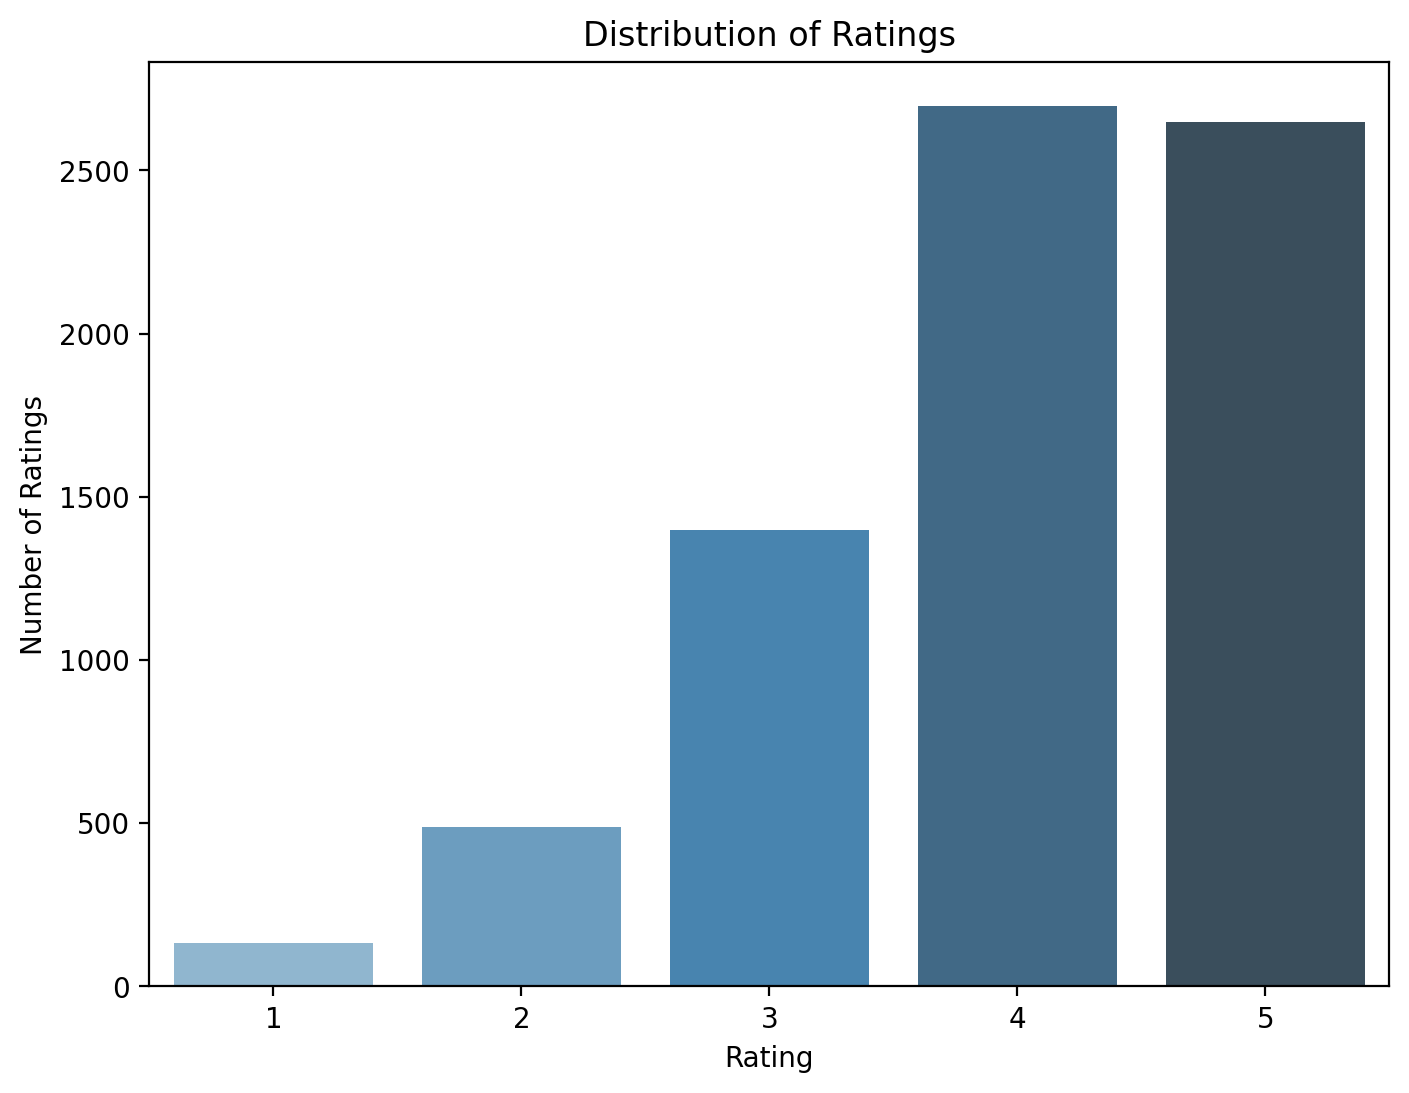

In [7]:
# Bar chart of ratings distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues_d")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

**Note**: This bar chart shows the number of ratings for each rating value from 1 to 5.

### 5.3 User Interaction Patterns

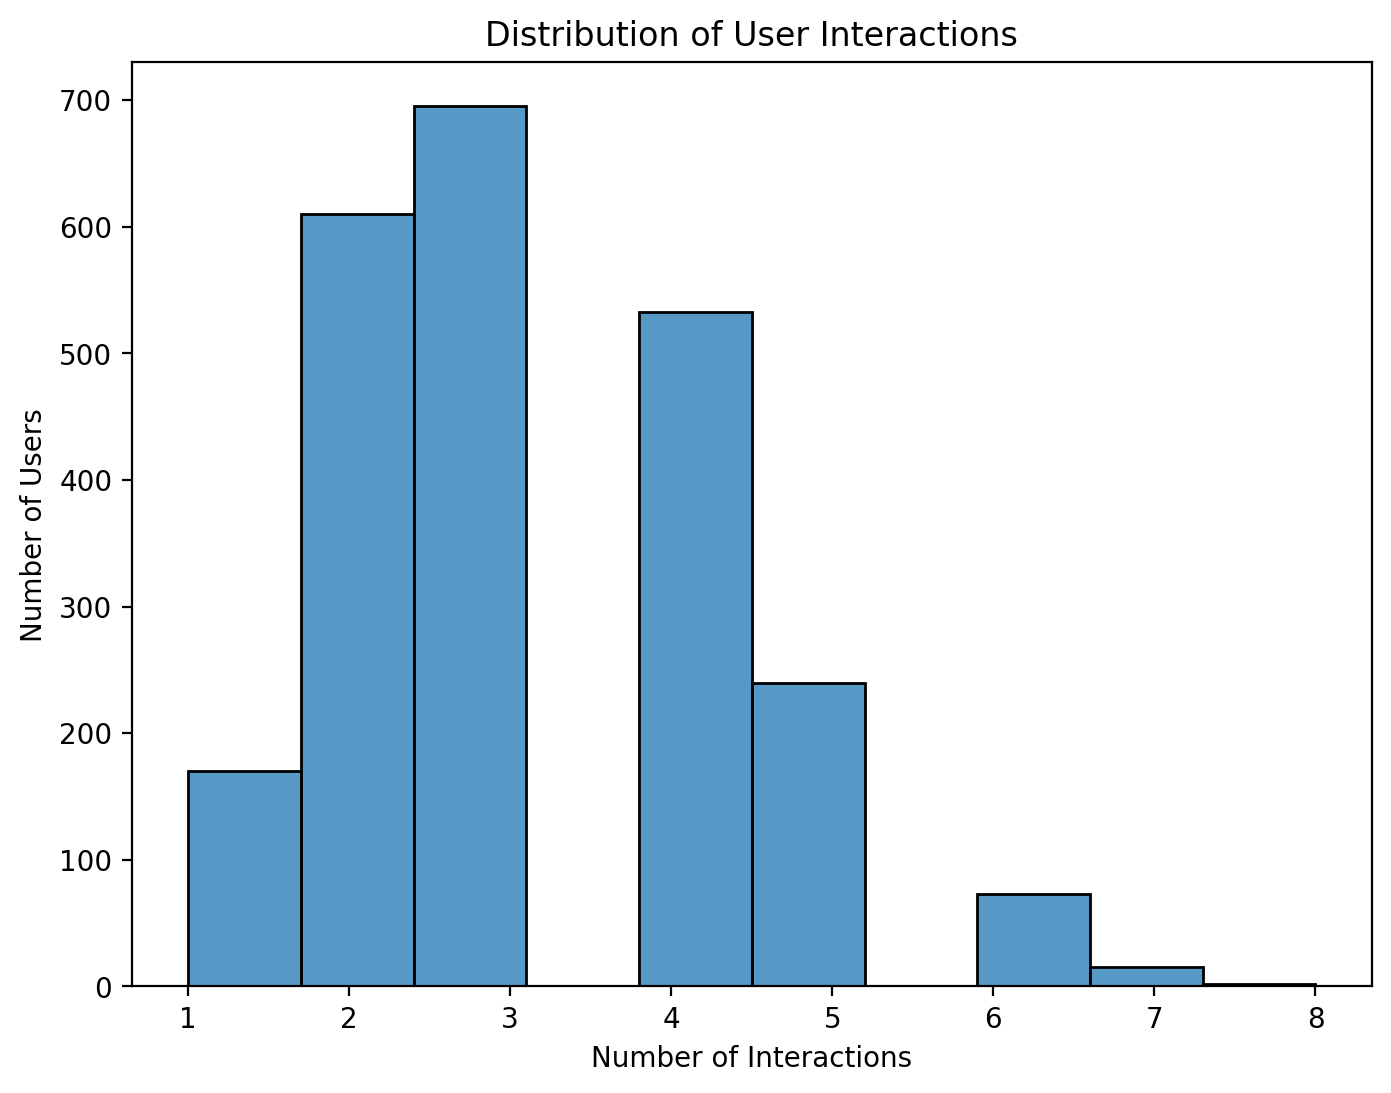

In [8]:
# Number of interactions per user
user_interactions = user_ratings['user_id'].value_counts()

# Histogram of user interactions
plt.figure(figsize=(8, 6))
sns.histplot(user_interactions, kde=False, bins= 10, color='tab:blue')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

## 6. **Course Data Analysis**

Now, let’s analyze the course information data.

### 6.1 Number of Courses

In [9]:
# Number of unique courses
num_courses = course_info['course_id'].nunique()
print(f"Total number of courses: {num_courses}")

Total number of courses: 210


### 6.2 Course Topics Analysis

In [10]:
# Sum of courses per topic
topic_columns = ['data_analysis', 'data_science', 'data_engineering',
                 'data_visualization', 'business_intelligence',
                 'artificial_intelligence', 'cloud_computing']

topic_counts = course_info[topic_columns].sum().sort_values(ascending=False)
topic_counts.index = [column.replace("_", " ").title() for column in topic_counts.index]

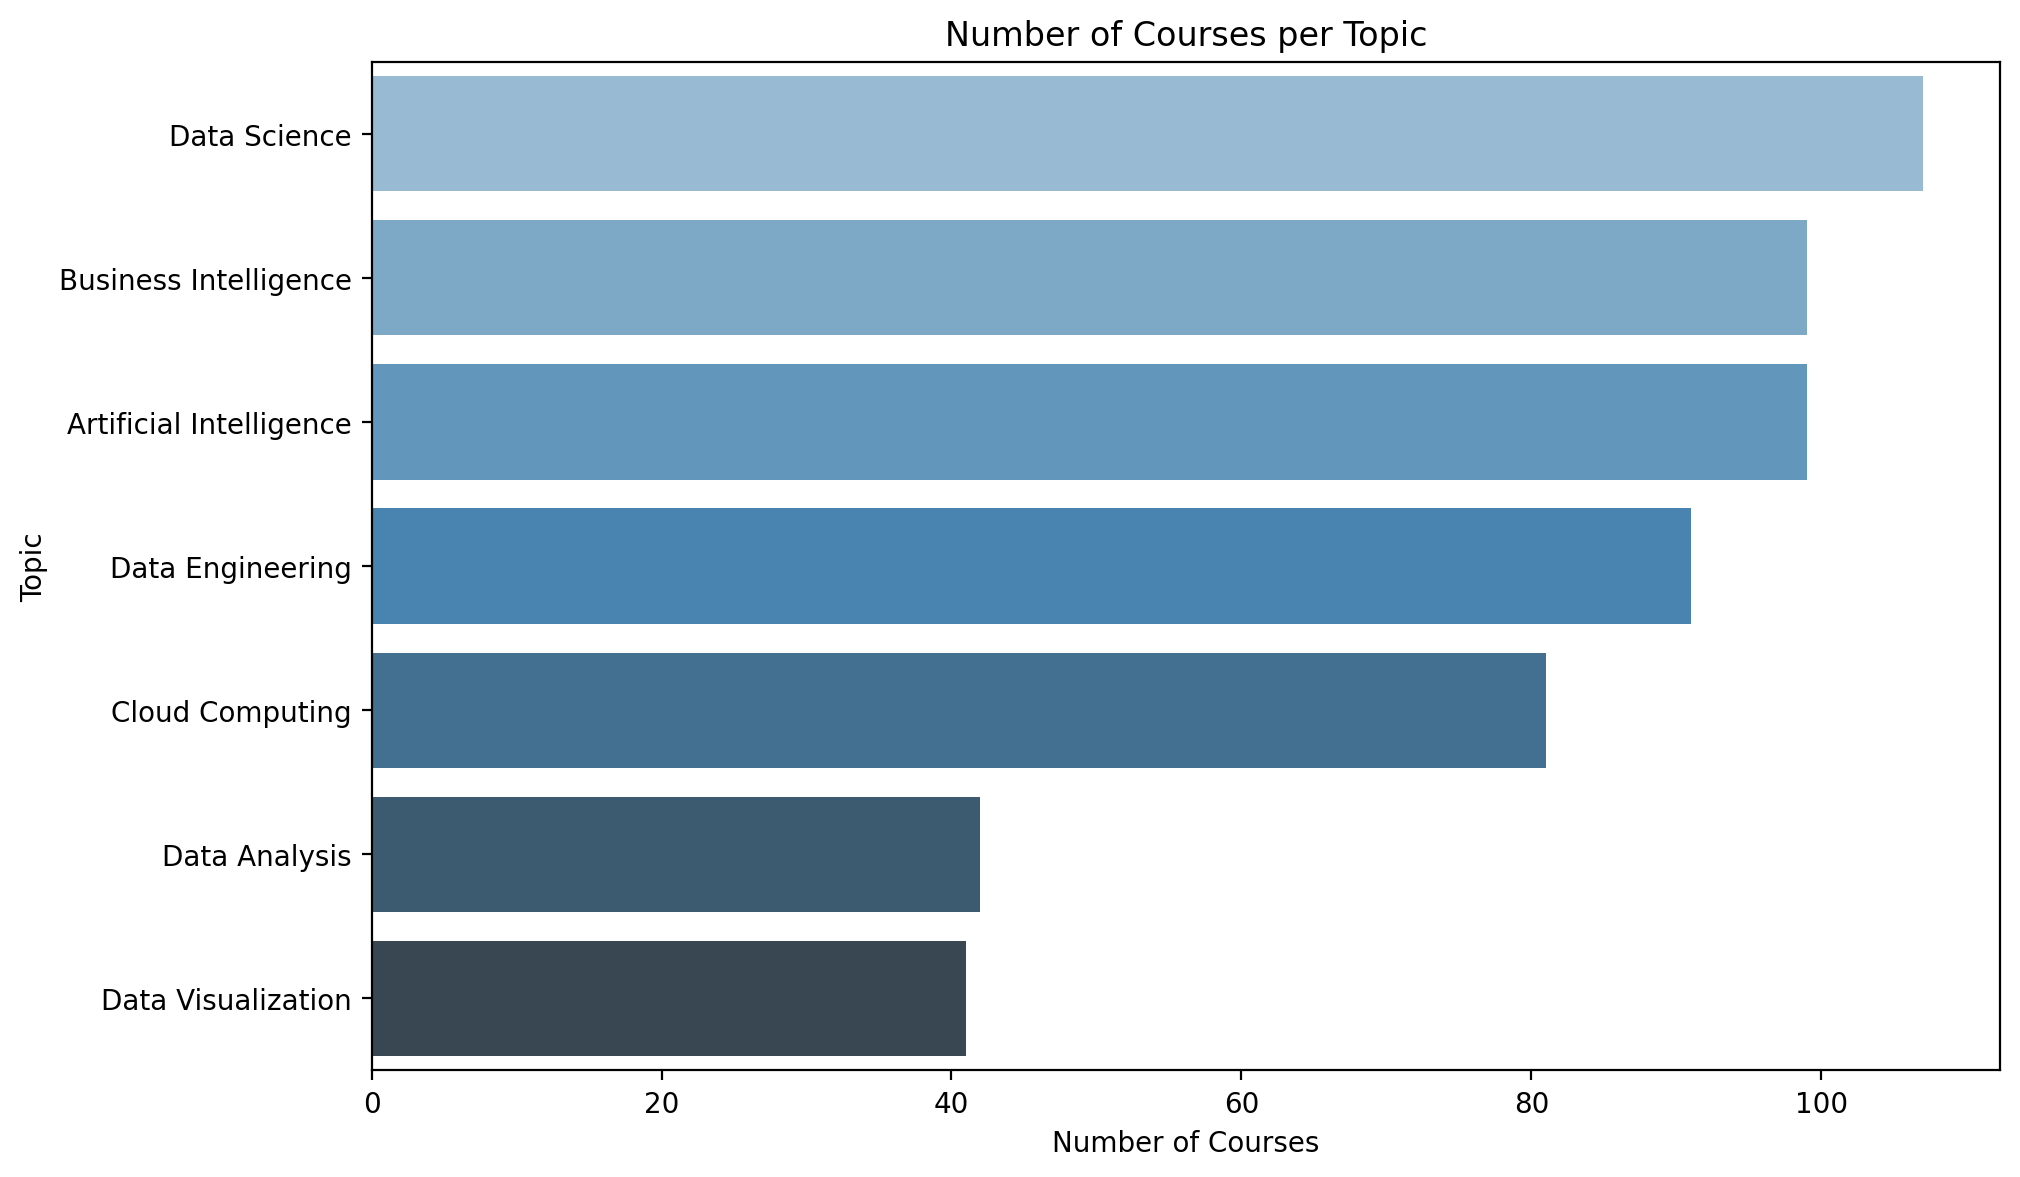

In [11]:
# Bar chart of number of courses per topic
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='Blues_d')
plt.title('Number of Courses per Topic')
plt.xlabel('Number of Courses')
plt.ylabel(None)
plt.tight_layout()
plt.ylabel('Topic')
plt.show()

### 6.3 Most Popular Courses

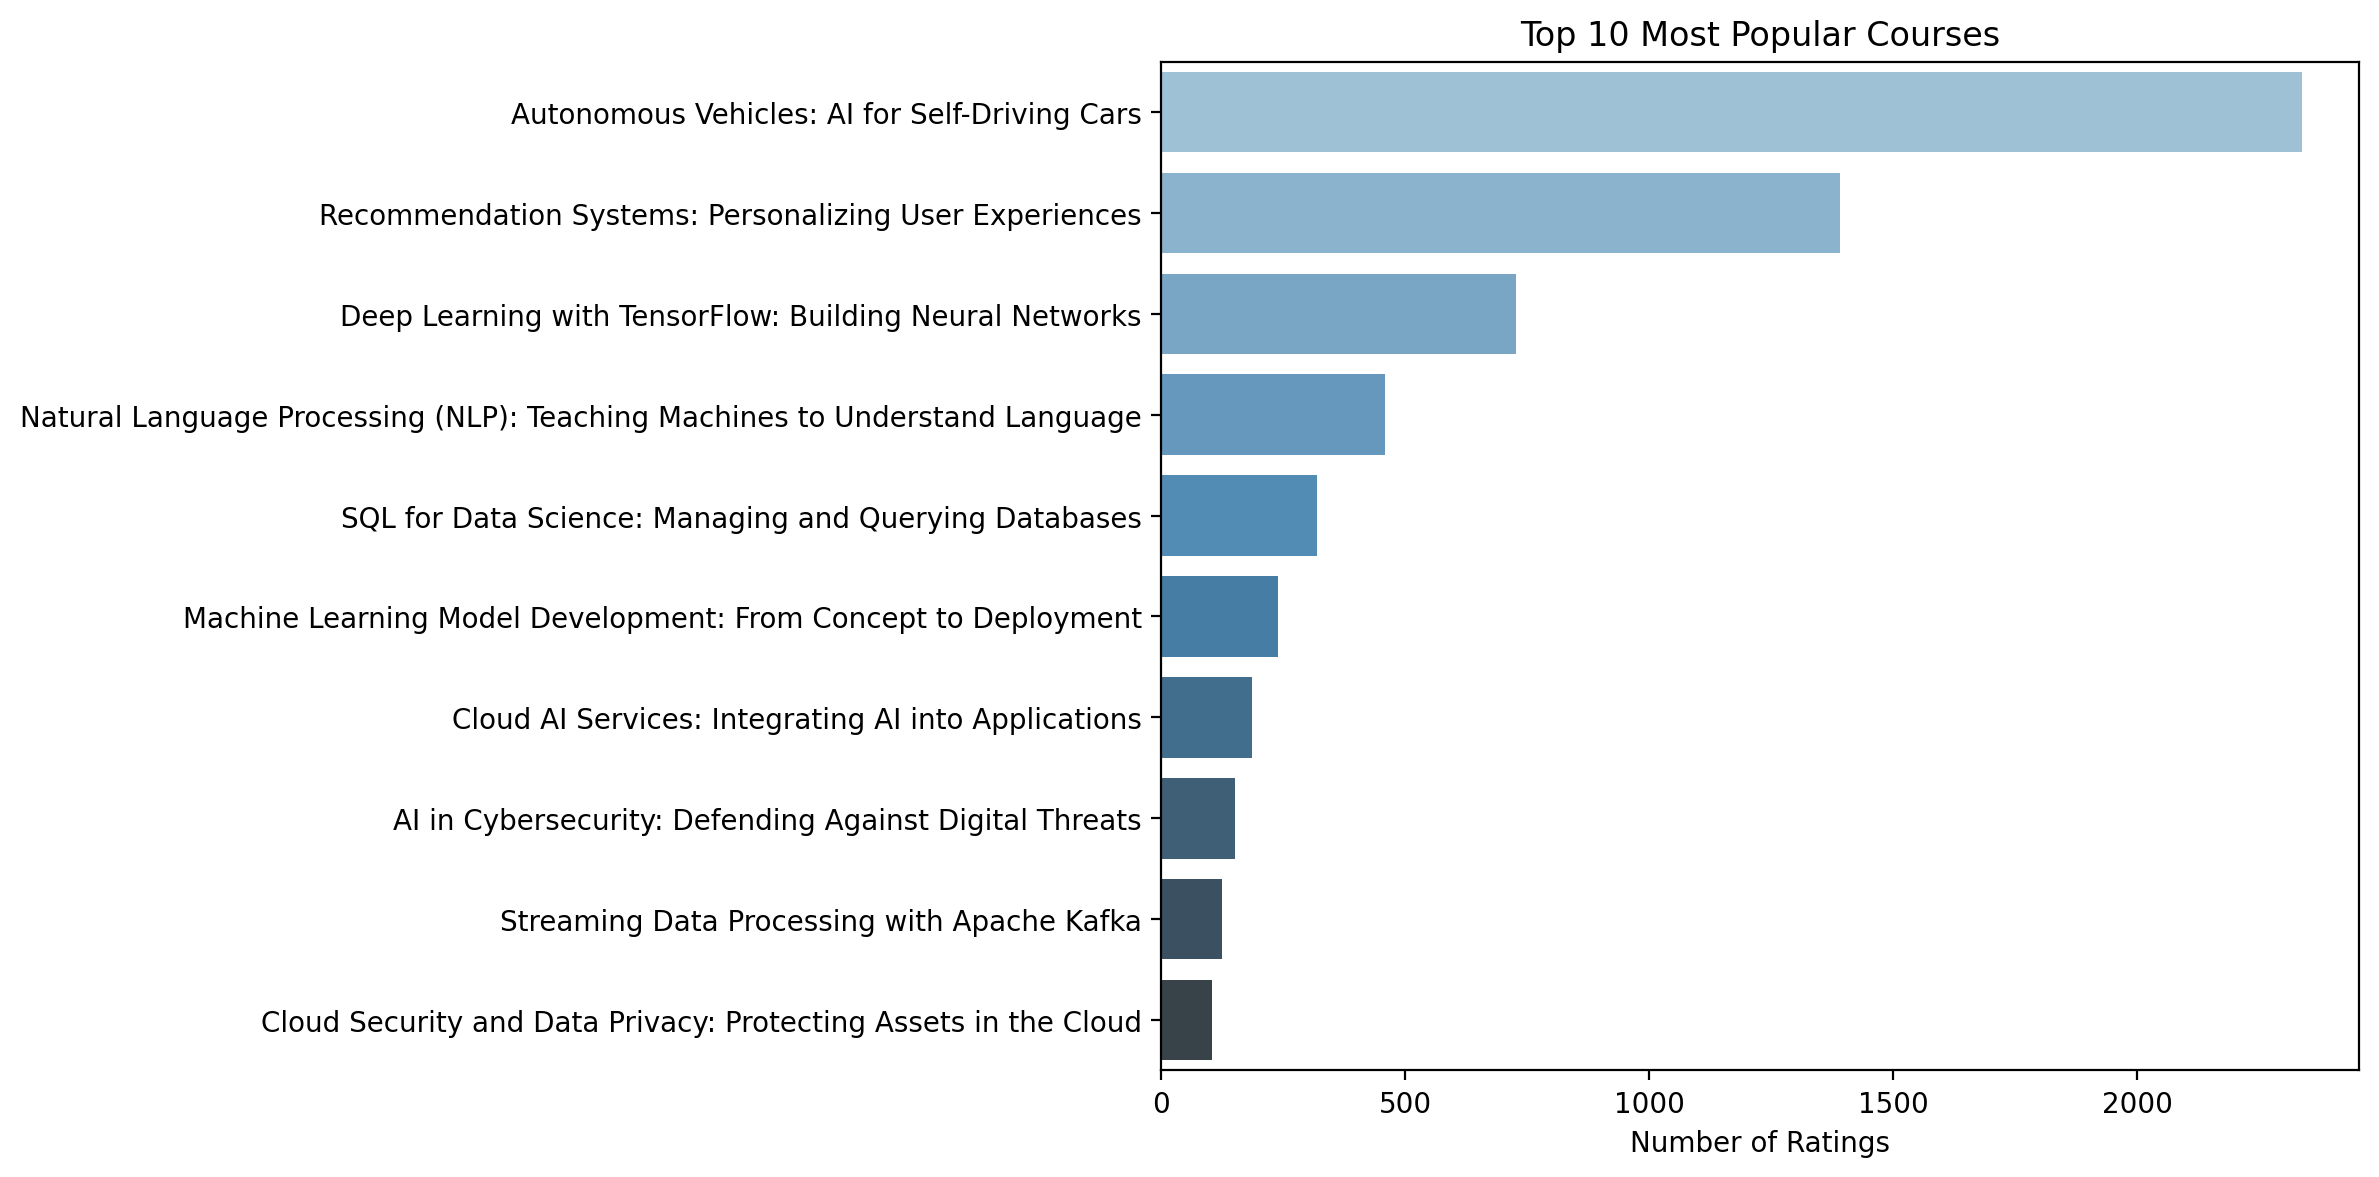

In [12]:
# Merge user ratings with course info
ratings_with_titles = pd.merge(user_ratings, course_info[['course_id', 'title']], on='course_id')

# Calculate the number of ratings per course
course_ratings_count = ratings_with_titles.groupby('title').size().sort_values(ascending=False).head(10)

# Bar chart of most popular courses
plt.figure(figsize=(12, 6))
sns.barplot(x=course_ratings_count.values, y=course_ratings_count.index, palette='Blues_d')
plt.title('Top 10 Most Popular Courses')
plt.xlabel('Number of Ratings')
plt.ylabel('Course Title')
plt.ylabel(None)
plt.tight_layout()
plt.show()

### 6.4 Word Cloud of Course Title

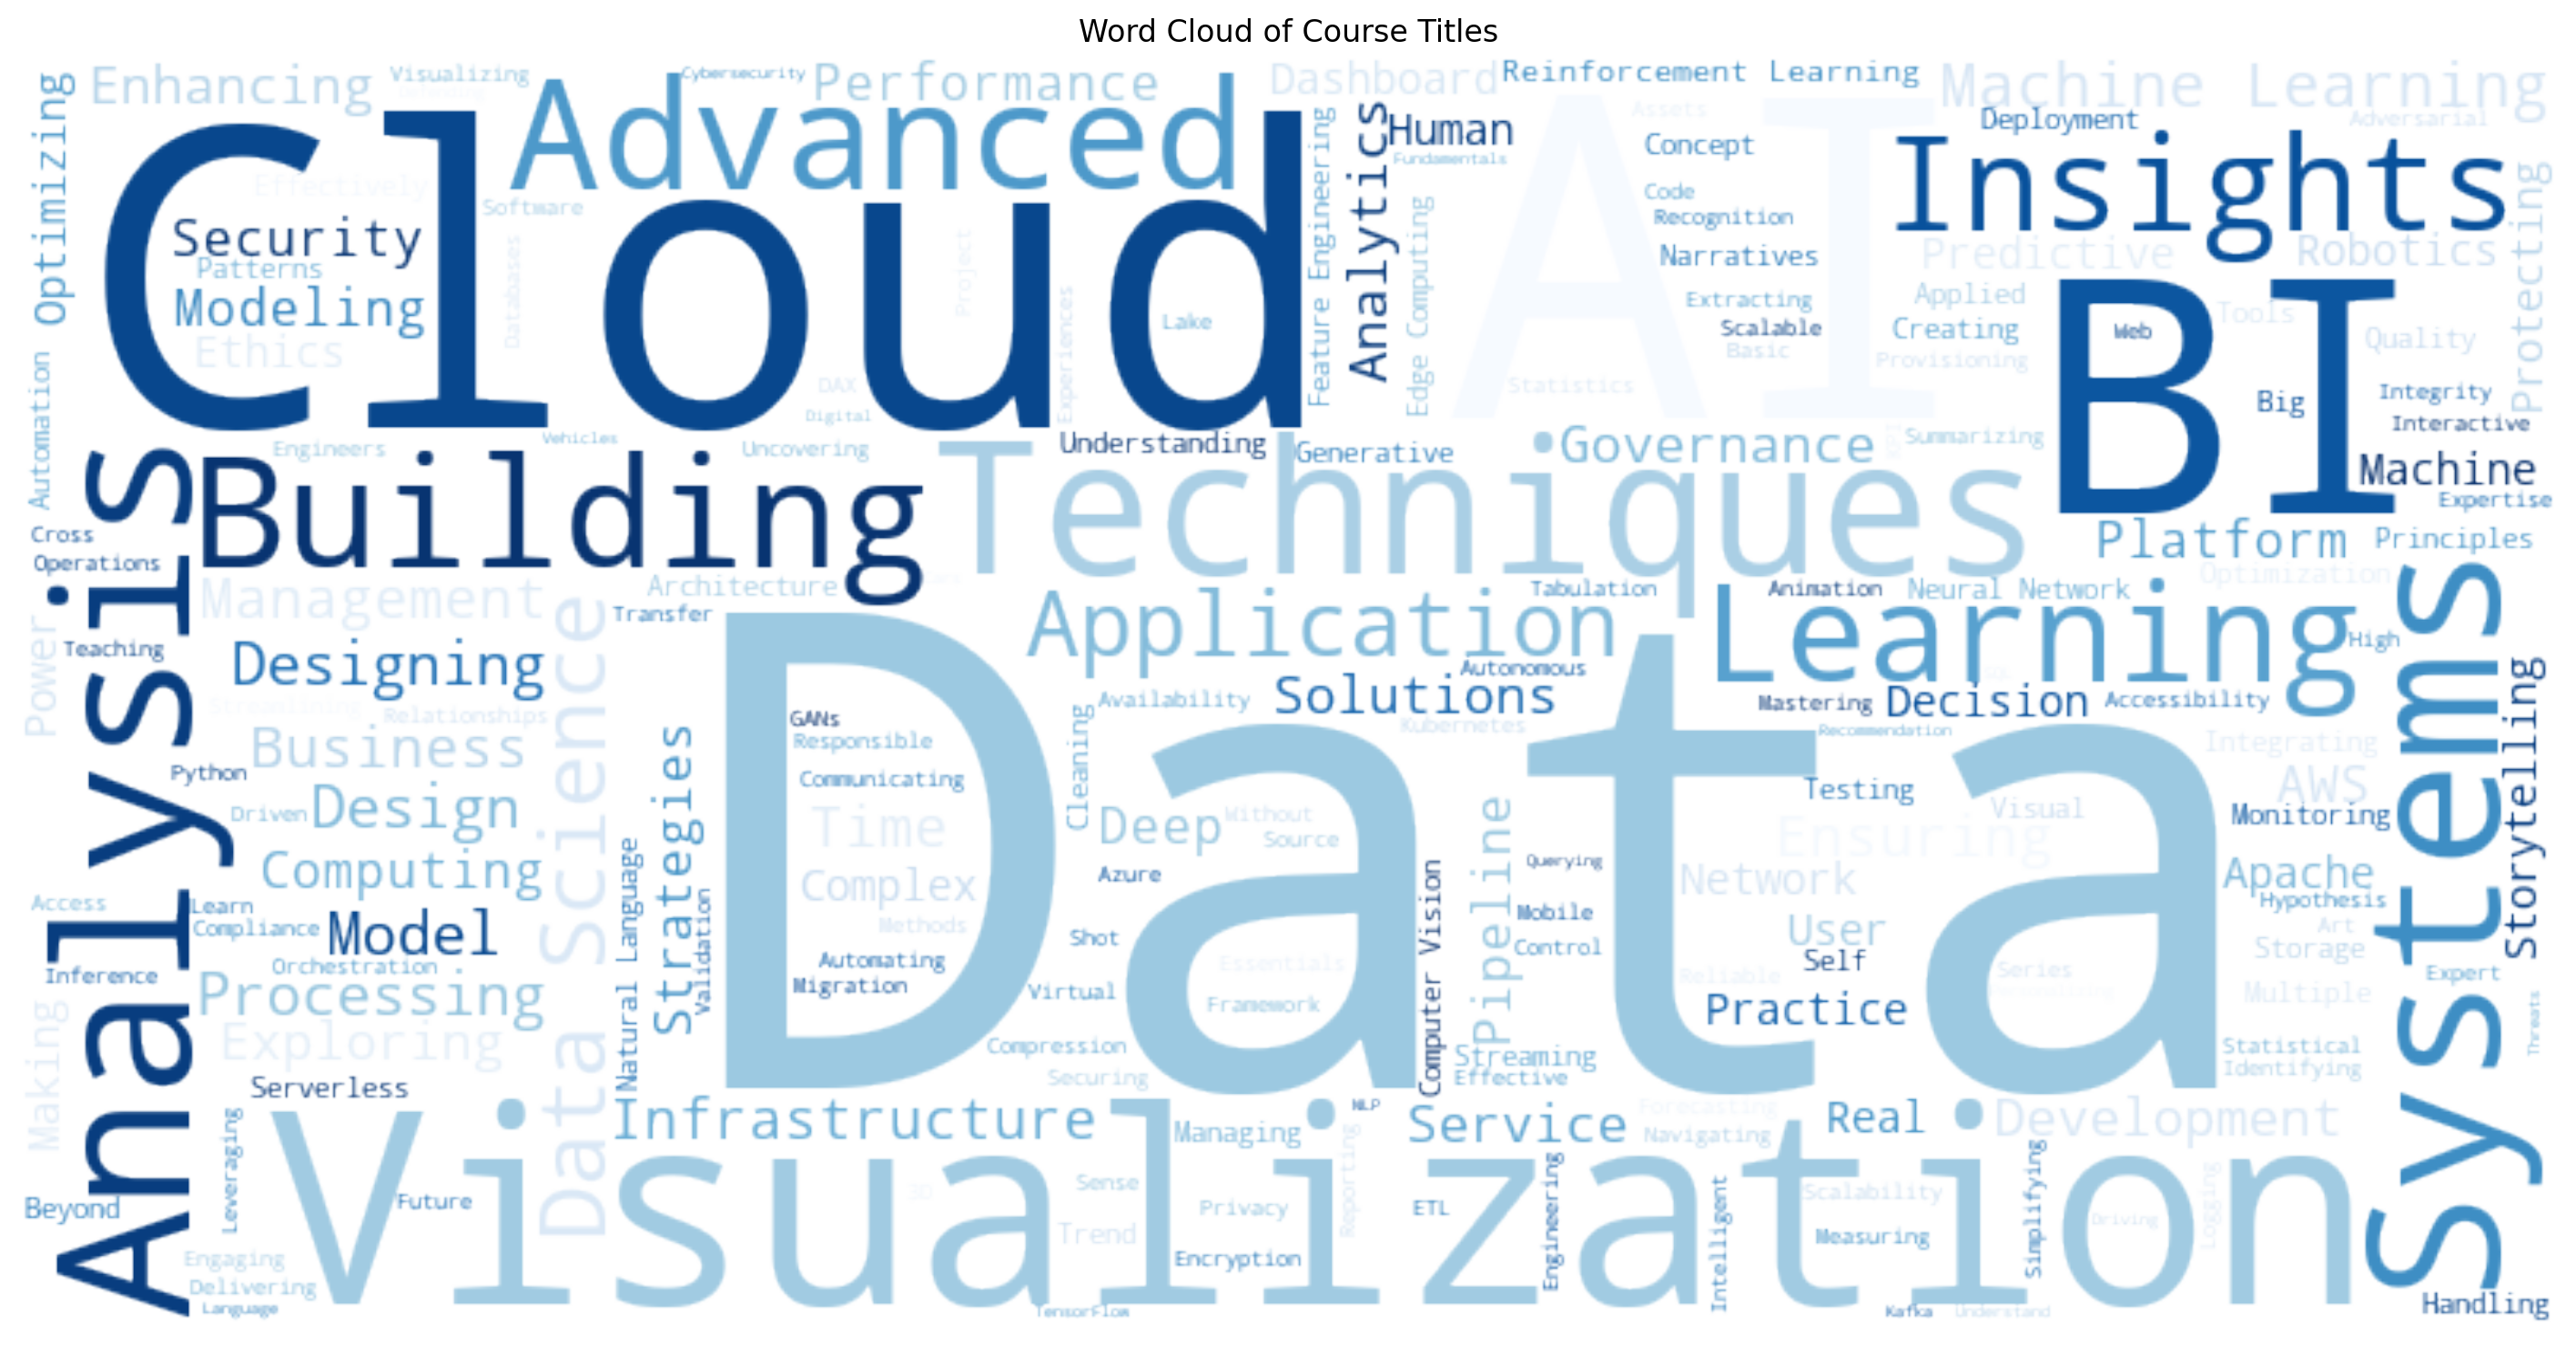

In [13]:
# Combine all course titles into one string
titles = ' '.join(course_info['title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='rgba(255, 255, 255, 0)', colormap='Blues_r', mode='RGBA').generate(titles)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Course Titles')
plt.tight_layout()
plt.show()

**Note**: This word cloud visualizes the most common words in course titles, highlighting prevalent themes.

## 7. **Key Findings**

**Based on our analysis**:

1. **User Interactions**:
   * There are **2338** unique users with approximately **7366** total interactions.
   * The average number of interactions per user is around **4**.
2. **Ratings Distribution**:
   * The majority of ratings are **4** and **5**, indicating generally positive user experiences.
   * Ratings of **1** and **2** are less common.
3. **Popular Courses**:
   * Some courses like **CID0001** (*Autonomous Vehicles: AI for Self-Driving Cars*) have a high number of interactions and positive ratings.
   * These courses are likely central to user engagement.
4. **User Preferences**:
   * Strong interest in courses related to **Data Science**, **Business Intelligence**, and, **Artificial Intelligence**.
   * These topics have the highest number of courses and possibly the highest enrollment.
5. **Course Topics**:
   * The distribution of courses across topics shows that **Data Science**, **Business Intelligence**, and, **Artificial Intelligence** are the most covered subjects.
   * This aligns with user interests and ratings trends.
6. **Data Quality Insights**:
   * No missing values or obvious data quality issues were detected.
   * Data appears suitable for modeling.

## 8. **Conclusion**

**The exploratory data analysis reveals valuable insights**:

1. **Alignment between User Interests and Course Offerings**:
   * There’s a strong alignment between popular topics among users and the number of courses available in those topics.
2. **Positive User Experience**:
   * High ratings suggest users are generally satisfied with the courses.
3. **Focus Areas for Recommendation Systems**:
   * Emphasis on **Data Science**, **Business Intelligence**, and, **Artificial Intelligence** can enhance personalization.
   * Popular courses can be leveraged in recommendation algorithms.

## 9. **Thanks and Contact Information**

Thank you for reviewing this project notebook. For any further questions, suggestions, or collaborations, please feel free to reach out:

   * [**Email**](mailto:leejoabraham01@gmail.com)
   * [**LinkedIn**](https://www.linkedin.com/in/leejoabraham01)
   * [**GitHub**](https://github.com/LeejoAbraham01)